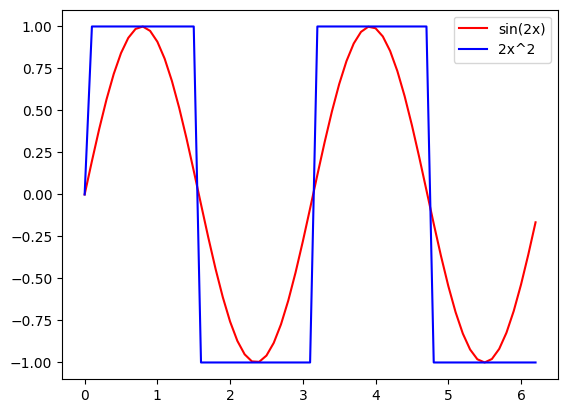

In [456]:
import numpy as np
from math import sin
import matplotlib.pyplot as plt

#square is a rect- angular curve serving as a "box" envelope for the sine wave, i.e. it is 1 for arguments where the sin>=0 and -1 otherwise)
def square(x):
    return np.sign(np.sin(2*x))
    

def function1(x):
    return np.sin(2*x)

#reating a column vector containing the points (patterns) to the interval [0,2π]
#Sample this interval starting from 0 with the step size of 0.1 and calculate the values of the two functions at the these points to obtain the corresponding training sets.
x_train = np.arange(0, 2*np.pi, 0.1)
training_set1 = function1(x_train)
training_set2 = square(x_train)

#plot the values of the training sets
plt.plot(x_train, training_set1, 'r', label='sin(2x)')
plt.plot(x_train, training_set2, 'b', label='2x^2')
plt.legend()
plt.show()

#test set 
x_test = np.arange(0.05, 2*np.pi, 0.1)
test_set1 = function1(x_test)
test_set2 = square(x_test)



In [457]:
#rbf_train function
def RBF_train_batch(x_train, t_train,num_hidden, w_output, centers, widths, learning_rate, num_iterations, error):
    for iteration in range(num_iterations):
        #calculate the values of the hidden layer
        hidden_layer = np.zeros((num_hidden, len(x_train)))
        for i in range(num_hidden):
            for j in range(len(x_train)):
                hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
        #calculate the output of the network
        output = np.dot(w_output, hidden_layer)
        #calculate the error
        error[iteration] = 0.5*np.sum((t_train-output)**2)
        #calculate the gradient of the output layer
        inverse = np.linalg.inv(np.dot(hidden_layer, hidden_layer.T))
        matrix = np.dot(hidden_layer,t_train)
        #update the weights of the output layer
        w_output = np.dot(inverse,matrix)
    return w_output, error


def RBF_train_sequential(x_train, t_train,num_hidden, w_output, centers, widths, learning_rate, num_iterations, error):
    for iteration in range(num_iterations):
        #shuffle the training set
        indices = np.random.permutation(len(x_train))
        x_train = x_train[indices]
        t_train = t_train[indices]
        for j in range(len(x_train)):
            #calculate the values of the hidden layer
            hidden_layer = np.zeros(num_hidden)
            for i in range(num_hidden):
                hidden_layer[i] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
            #calculate the output of the network
            output = np.dot(w_output, hidden_layer)[0]
            #calculate the error
            error[iteration] += 0.5*(t_train[j]-output)**2
            #calculate the gradient of the output layer
            gradient_output = (t_train[j]-output)
            #update the weights of the output layer
            w_output += learning_rate*gradient_output*hidden_layer
    return w_output, error


In [458]:

#the average absolute difference between the network outputs and the desirable target values
def absolut_residual_error(output, t_test):
    return np.mean(np.abs(output-t_test))


In [459]:

def result_train(num_hidden,x_train,training_set1,learning_rate,num_iterations,batch = True):
    #implementation supervised learning of weights of the RBF network built to address a simple regression problem, batch learning from scratch

#number of neurons in the output layer 1
    num_output = 1
#initialize the weights of the output layer
    w_output = np.random.rand(num_output, num_hidden)

#initialize the centers of the RBF neurons
    centers = np.zeros(num_hidden)
#choose the centers of the RBF neurons to be separated by the same distance and to be located in the middle of the interval [0,2π]
    for i in range(num_hidden):
        centers[i] = (2*np.pi/(num_hidden))*i + (np.pi/num_hidden)

#initialize the widths of the RBF neurons
    widths = np.ones(num_hidden)*(2*np.pi/(num_hidden))

#initialize the error
    error_1 = np.zeros(num_iterations)

#train the network
    if batch:
        w_output_1, error_1 = RBF_train_batch(x_train, training_set1,num_hidden,w_output, centers, widths, learning_rate, num_iterations, error_1)
    else:
  
        w_output_1, error_1 = RBF_train_sequential(x_train, training_set1,num_hidden,w_output, centers, widths, learning_rate, num_iterations, error_1)
    return w_output_1, error_1,centers,widths


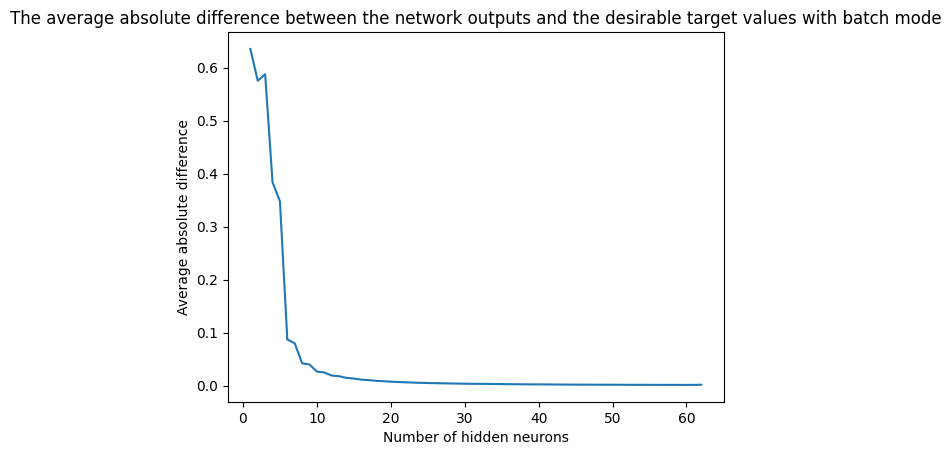

In [460]:
list_num_hidden = [i for i in range(1, 63)]
learning_rate = 0.01
num_iterations = 2
result = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set1,learning_rate,num_iterations,True)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result.append(absolut_residual_error(output, test_set1))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result)
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values with batch mode')
plt.show()


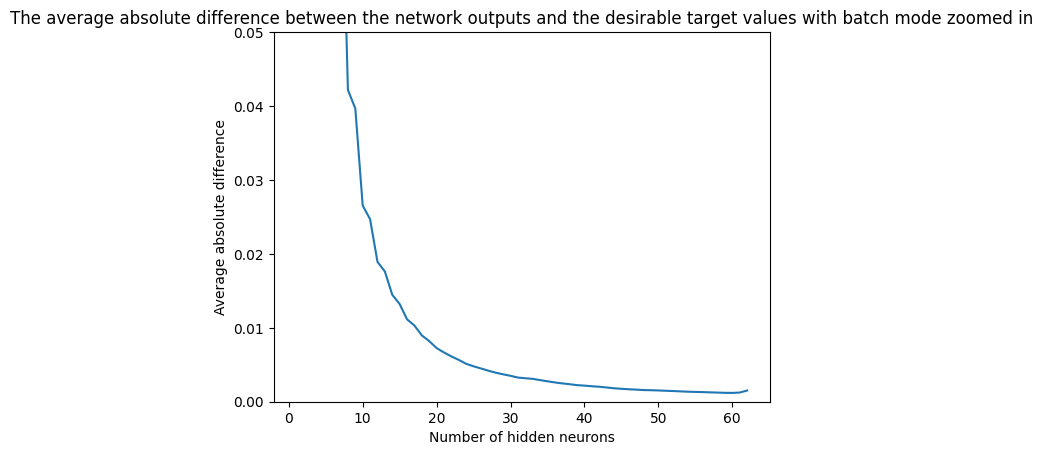

In [461]:

#plot zoomed in
plt.plot(list_num_hidden, result)
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values with batch mode zoomed in')
plt.ylim(0, 0.05)
plt.show()

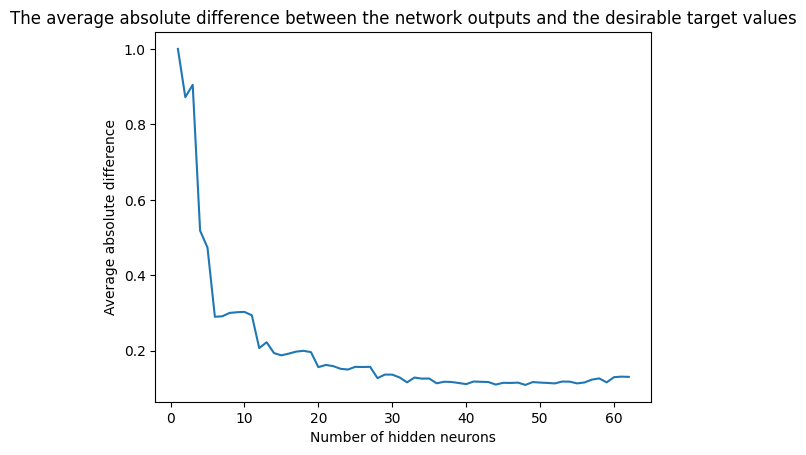

In [462]:
list_num_hidden = [i for i in range(1, 63)]
learning_rate = 0.01
num_iterations = 2
result = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2,learning_rate,num_iterations,True)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result.append(absolut_residual_error(output, test_set2))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result)
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values')
plt.show()


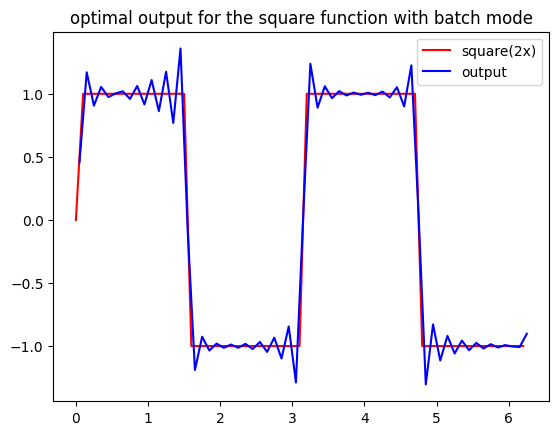

In [463]:
#plot the values of the training set
plt.plot(x_train, training_set2, 'r', label='square(2x)')
#plot the values of the output
plt.plot(x_test, output.T, 'b', label='output')
plt.title('optimal output for the square function with batch mode')
plt.legend()
plt.show()


In [464]:
#find the best number of hidden neurons
print(min(result), list_num_hidden[result.index(min(result))])


0.10928029267720496 48


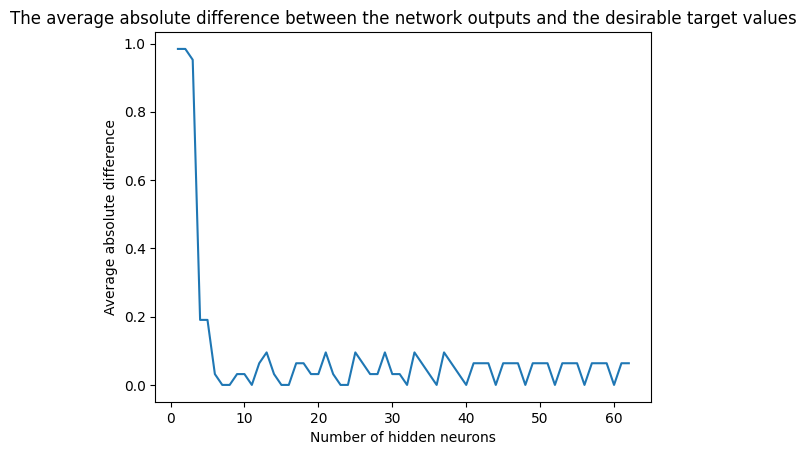

In [465]:
list_num_hidden = [i for i in range(1, 63)]
learning_rate = 0.01
num_iterations = 2
result = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2,learning_rate,num_iterations,True)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    output = np.sign(output)
    result.append(absolut_residual_error(output, test_set2))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result)
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values')
plt.show()



In [466]:
print(min(result), list_num_hidden[result.index(min(result))])



0.0 7


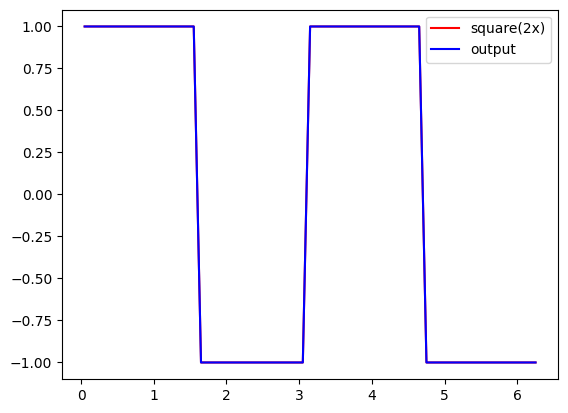

In [467]:
num_hidden = 7
w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2,learning_rate,num_iterations,True)
hidden_layer = np.zeros((num_hidden, len(x_test)))
for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
output = np.dot(w_output, hidden_layer)
output = output.T.reshape(-1)
output = np.sign(output)
#plot the values of the training set
plt.plot(x_test, test_set2, 'r', label='square(2x)')
#plot the values of the output
plt.plot(x_test, output.T, 'b', label='output')
plt.legend()
plt.show()

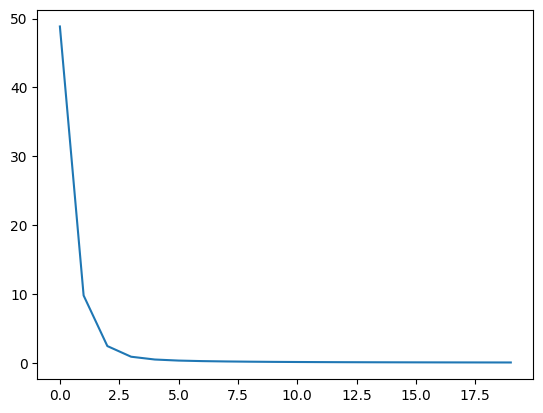

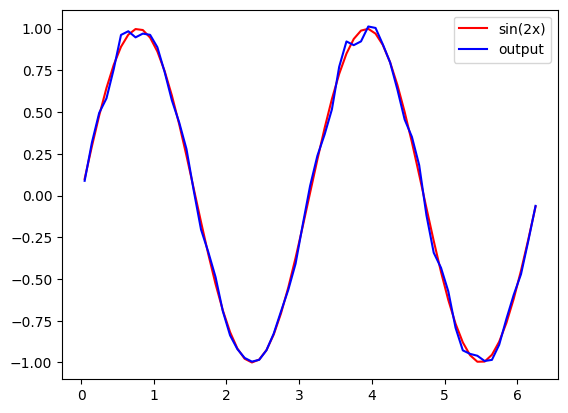

The average absolute difference between the network outputs and the desirable target values: 0.02684094394591317


In [468]:

num_hidden = 50
learning_rate = 0.1
num_iterations = 20
w_output, error,centers,widths = result_train(num_hidden,x_train,training_set1,learning_rate,num_iterations,False)
#plot the error
plt.plot(error)
plt.show()
#test the network
#calculate the values of the hidden layer
hidden_layer = np.zeros((num_hidden, len(x_test)))
for i in range(num_hidden):
    for j in range(len(x_test)):
        hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
output = np.dot(w_output, hidden_layer)
#plot the values of the training set
plt.plot(x_test, test_set1, 'r', label='sin(2x)')
#plot the values of the output
plt.plot(x_test, output.T, 'b', label='output')
plt.legend()
plt.show()

output = output.T.reshape(-1)
print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))


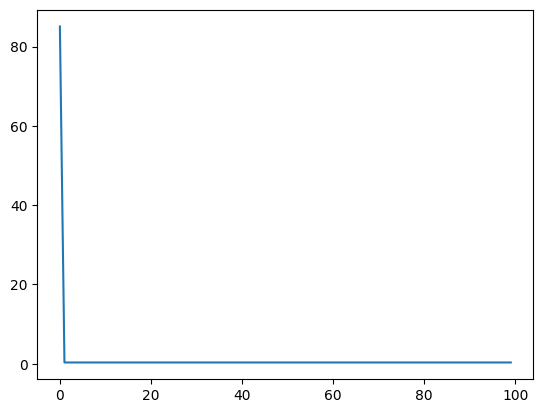

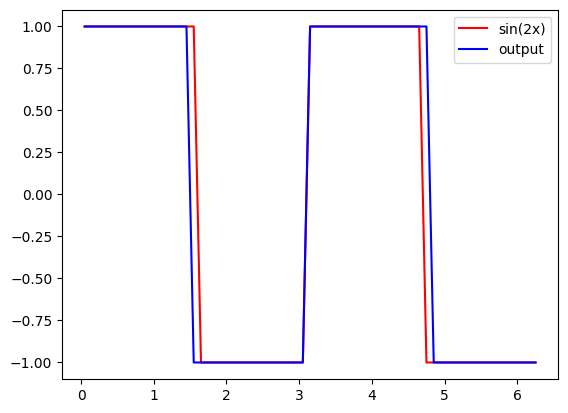

The average absolute difference between the network outputs and the desirable target values: 0.06349206349206349


In [469]:
num_hidden = 50
learning_rate = 0.01
num_iterations = 100
w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2,learning_rate,num_iterations,True)
#plot the error
plt.plot(error)
plt.show()
#test the network
#calculate the values of the hidden layer
hidden_layer = np.zeros((num_hidden, len(x_test)))
for i in range(num_hidden):
    for j in range(len(x_test)):
        hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
output = np.dot(w_output, hidden_layer)
#convert the output to the desired form
output = np.sign(output.T.reshape(-1))
#plot the values of the training set
plt.plot(x_test, test_set2, 'r', label='sin(2x)')
#plot the values of the output
plt.plot(x_test, output, 'b', label='output')
plt.legend()
plt.show()


print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set2))


In [470]:
#add noise to the data set
training_set1_noisy = training_set1 + np.random.normal(0, 0.1, len(training_set1))
training_set2_noisy = training_set2 + np.random.normal(0, 0.1, len(training_set2))
test_set1_noisy = test_set1 + np.random.normal(0, 0.1, len(test_set1))
test_set2_noisy = test_set2 + np.random.normal(0, 0.1, len(test_set2))


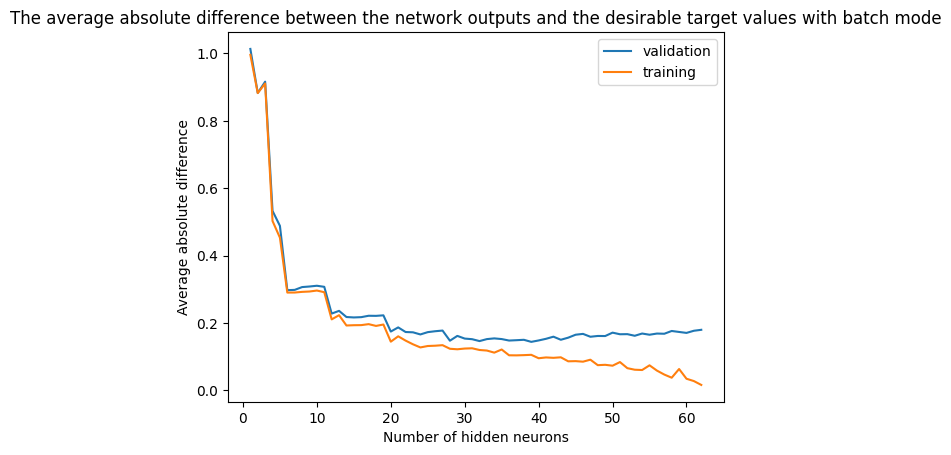

In [471]:
list_num_hidden = [i for i in range(1, 63)]
learning_rate = 0.01
num_iterations = 2
result_val = []
result_tra = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2_noisy,learning_rate,num_iterations,True)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_val.append(absolut_residual_error(output, test_set2_noisy))

    hidden_layer = np.zeros((num_hidden, len(x_train)))
    for i in range(num_hidden):
        for j in range(len(x_train)):
            hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_tra.append(absolut_residual_error(output, training_set2_noisy))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result_val, label = 'validation')
plt.plot(list_num_hidden, result_tra, label = 'training')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values with batch mode')
plt.legend()
plt.show()



In [472]:
#plot

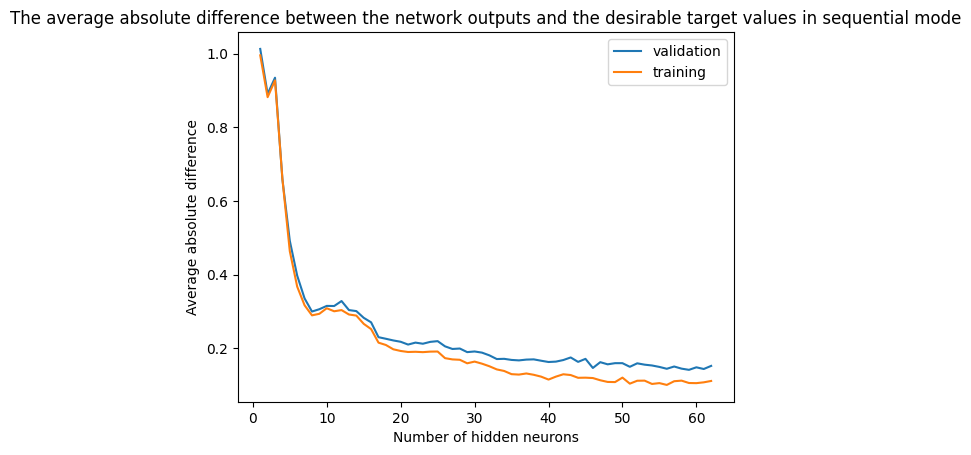

In [473]:
list_num_hidden = [i for i in range(1, 63)]
learning_rate = 0.1
num_iterations = 20
result_val = []
result_tra = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2_noisy,learning_rate,num_iterations,False)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_val.append(absolut_residual_error(output, test_set2_noisy))

    hidden_layer = np.zeros((num_hidden, len(x_train)))
    for i in range(num_hidden):
        for j in range(len(x_train)):
            hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_tra.append(absolut_residual_error(output, training_set2_noisy))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result_val, label = 'validation')
plt.plot(list_num_hidden, result_tra, label = 'training')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values in sequential mode')
plt.legend()
plt.show()


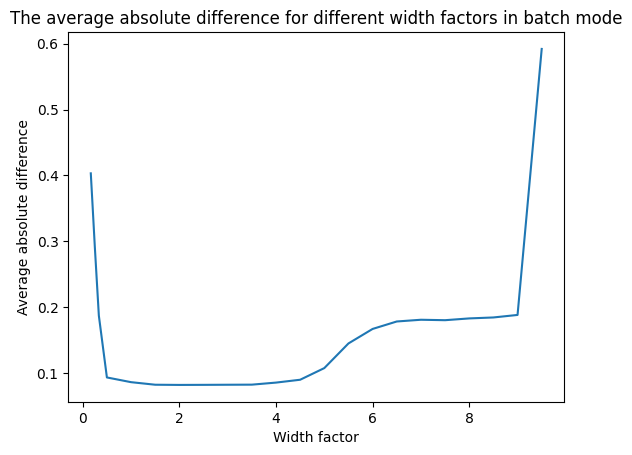

In [474]:
list_width_factor = [1/i for i in range(6,1,-1)]+[i/2 for i in range(2, 20)]
num_hidden = 10
learning_rate = 0.1
num_iterations = 5
result = []

#implementation supervised learning of weights of the RBF network built to address a simple regression problem, batch learning from scratch

#number of neurons in the output layer 1
num_output = 1
#initialize the weights of the output layer


#initialize the centers of the RBF neurons
centers = np.zeros(num_hidden)
#choose the centers of the RBF neurons to be separated by the same distance and to be located in the middle of the interval [0,2π]
for i in range(num_hidden):
    centers[i] = (2*np.pi/(num_hidden))*i + (np.pi/num_hidden)
for width_factor in list_width_factor:
    w_output = np.random.rand(num_output, num_hidden)
    #initialize the widths of the RBF neurons
    widths = np.ones(num_hidden)*(2*np.pi/(num_hidden))*width_factor
    error_1 = np.zeros(num_iterations)
    w_output_1, error_1 = RBF_train_batch(x_train, training_set1_noisy,num_hidden,w_output, centers, widths, learning_rate, num_iterations, error_1)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
    output = np.dot(w_output_1, hidden_layer)
    output = output.T.reshape(-1)
    result.append(absolut_residual_error(output, test_set1_noisy))

plt.plot(list_width_factor, result)
plt.xlabel('Width factor')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference for different width factors in batch mode')
plt.show()




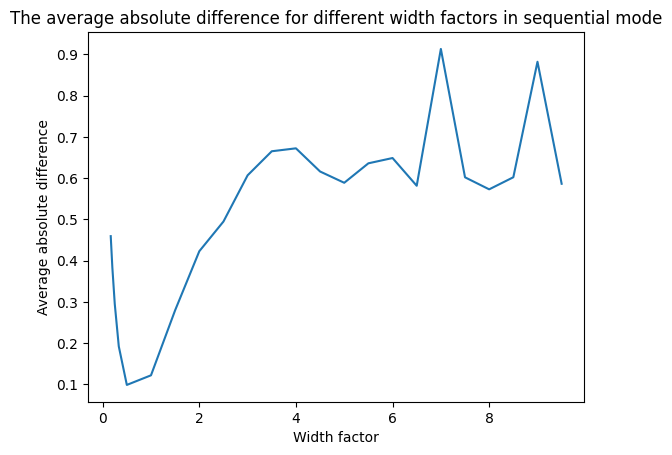

In [475]:
list_width_factor = [1/i for i in range(6,1,-1)]+[i/2 for i in range(2, 20)]
num_hidden = 10
learning_rate = 0.1
num_iterations = 5
result = []

#implementation supervised learning of weights of the RBF network built to address a simple regression problem, batch learning from scratch

#number of neurons in the output layer 1
num_output = 1
#initialize the weights of the output layer


#initialize the centers of the RBF neurons
centers = np.zeros(num_hidden)
#choose the centers of the RBF neurons to be separated by the same distance and to be located in the middle of the interval [0,2π]
for i in range(num_hidden):
    centers[i] = (2*np.pi/(num_hidden))*i + (np.pi/num_hidden)
for width_factor in list_width_factor:
    w_output = np.random.rand(num_output, num_hidden)
    #initialize the widths of the RBF neurons
    widths = np.ones(num_hidden)*(2*np.pi/(num_hidden))*width_factor
    error_1 = np.zeros(num_iterations)
    w_output_1, error_1 = RBF_train_sequential(x_train, training_set1_noisy,num_hidden,w_output, centers, widths, learning_rate, num_iterations, error_1)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
    output = np.dot(w_output_1, hidden_layer)
    output = output.T.reshape(-1)
    result.append(absolut_residual_error(output, test_set1_noisy))

plt.plot(list_width_factor, result)
plt.xlabel('Width factor')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference for different width factors in sequential mode')
plt.show()

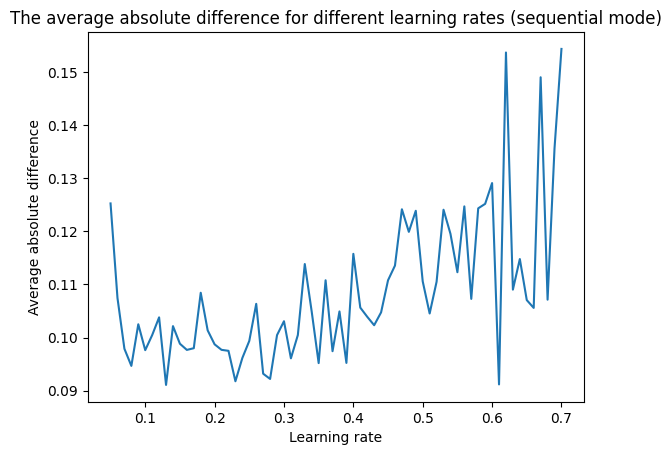

In [476]:
list_learning_rate = [i*0.01 for i in range(5, 71)]
num_hidden = 10
num_iterations = 20
result = []

#implementation supervised learning of weights of the RBF network built to address a simple regression problem, batch learning from scratch

#number of neurons in the output layer 1
num_output = 1
#initialize the weights of the output layer
widths = np.ones(num_hidden)*(2*np.pi/(num_hidden))

#initialize the centers of the RBF neurons
centers = np.zeros(num_hidden)
#choose the centers of the RBF neurons to be separated by the same distance and to be located in the middle of the interval [0,2π]
for i in range(num_hidden):
    centers[i] = (2*np.pi/(num_hidden))*i + (np.pi/num_hidden)
for learning_rate in list_learning_rate:
    w_output = np.random.rand(num_output, num_hidden)
    error_1 = np.zeros(num_iterations)
    w_output_1, error_1 = RBF_train_sequential(x_train, training_set1_noisy,num_hidden,w_output, centers, widths, learning_rate, num_iterations, error_1)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
    output = np.dot(w_output_1, hidden_layer)
    output = output.T.reshape(-1)
    result.append(absolut_residual_error(output, test_set1_noisy))
    

plt.plot(list_learning_rate, result)
plt.xlabel('Learning rate')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference for different learning rates (sequential mode)')
plt.show()

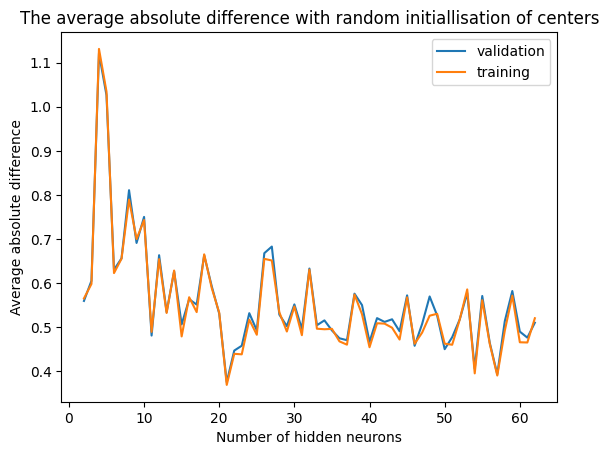

In [477]:

list_num_hidden = [i for i in range(2, 63)]
learning_rate = 0.1
num_iterations = 20
result_val = []
result_tra = []

for num_hidden in list_num_hidden:
    centers = np.zeros(num_hidden)
    widths = np.zeros(num_hidden)
#center randomly chosen
    for i in range(num_hidden):
        centers[i] = np.random.uniform(0, 2*np.pi)
    centers = np.sort(centers)
#widhts distance between the centers
    widths[0] = max((centers[1]-centers[0])/2, centers[0]/2)/2
    for i in range(1,num_hidden-1):
        widths[i] = max((centers[i]-centers[i-1])/2, (centers[i+1]-centers[i])/2)/2
    widths[num_hidden-1] = max((centers[num_hidden-1]-centers[num_hidden-2])/2, (2*np.pi-centers[num_hidden-1])/2)/2
    w_output, error,_,_ = result_train(num_hidden,x_train,training_set1_noisy,learning_rate,num_iterations,False)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_val.append(absolut_residual_error(output, test_set1_noisy))

    hidden_layer = np.zeros((num_hidden, len(x_train)))
    for i in range(num_hidden):
        for j in range(len(x_train)):
            hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_tra.append(absolut_residual_error(output, training_set1_noisy))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result_val, label = 'validation')
plt.plot(list_num_hidden, result_tra, label = 'training')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference with random initiallisation of centers')
plt.legend()
plt.show()



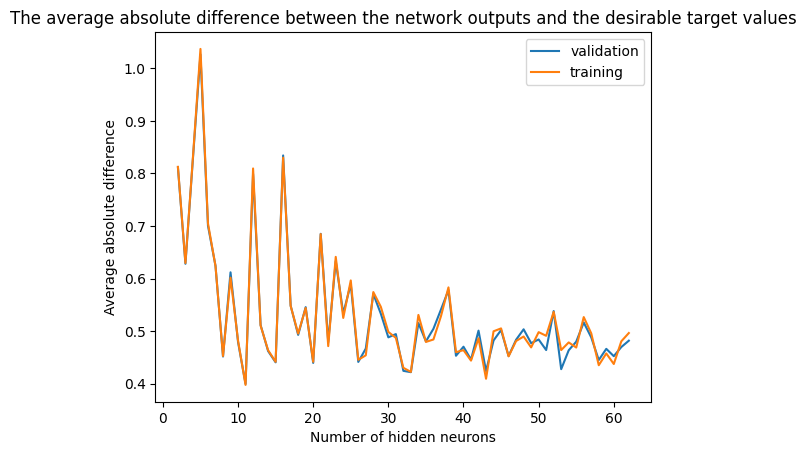

In [478]:


list_num_hidden = [i for i in range(2, 3)]
learning_rate = 0.1
num_iterations = 20
result_val = []
result_tra = []

for num_hidden in list_num_hidden:
    centers = np.zeros(num_hidden)
    widths = np.zeros(num_hidden)
#center randomly chosen all different from each other
    for i in range(num_hidden):
        centers[i] = np.random.uniform(0, 2*np.pi)
    centers = np.sort(centers)
#widhts distance between the centers
    widths[0] = max((centers[1]-centers[0])/2, centers[0]/2)/2
    for i in range(1,num_hidden-1):
        widths[i] = max((centers[i]-centers[i-1])/2, (centers[i+1]-centers[i])/2)/2
    widths[num_hidden-1] = max((centers[num_hidden-1]-centers[num_hidden-2])/2, (2*np.pi-centers[num_hidden-1])/2)/2
    w_output, error,_,_ = result_train(num_hidden,x_train,training_set1,learning_rate,num_iterations,False)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_val.append(absolut_residual_error(output, test_set1))

    hidden_layer = np.zeros((num_hidden, len(x_train)))
    for i in range(num_hidden):
        for j in range(len(x_train)):
            hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_tra.append(absolut_residual_error(output, training_set1))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result_val, label = 'validation')
plt.plot(list_num_hidden, result_tra, label = 'training')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values')
plt.legend()
plt.show()



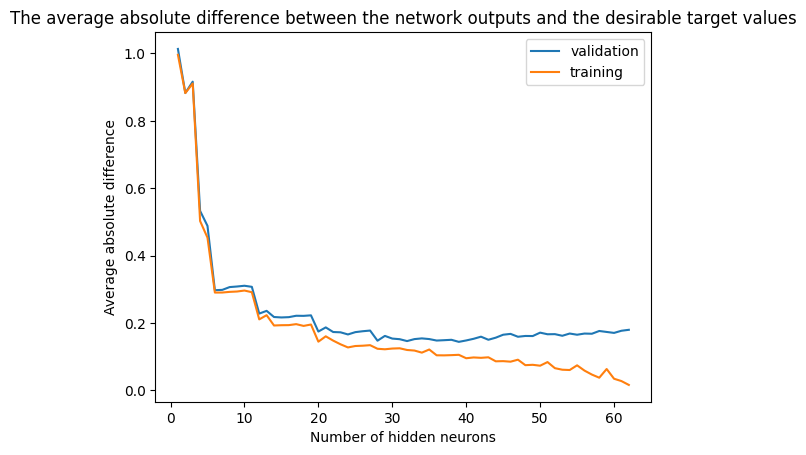

0.14378824253439196 39


In [479]:
list_num_hidden = [i for i in range(1, 3)]
learning_rate = 0.01
num_iterations = 2
result_val = []
result_tra = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2_noisy,learning_rate,num_iterations,True)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_val.append(absolut_residual_error(output, test_set2_noisy))

    hidden_layer = np.zeros((num_hidden, len(x_train)))
    for i in range(num_hidden):
        for j in range(len(x_train)):
            hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_tra.append(absolut_residual_error(output, training_set2_noisy))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

plt.plot(list_num_hidden, result_val, label = 'validation')
plt.plot(list_num_hidden, result_tra, label = 'training')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Average absolute difference')
plt.title('The average absolute difference between the network outputs and the desirable target values')
plt.legend()
plt.show()

print(min(result_val), list_num_hidden[result_val.index(min(result_val))])


(63,)
(63,)
[0.1743755518235448] [0.14432984016543352]


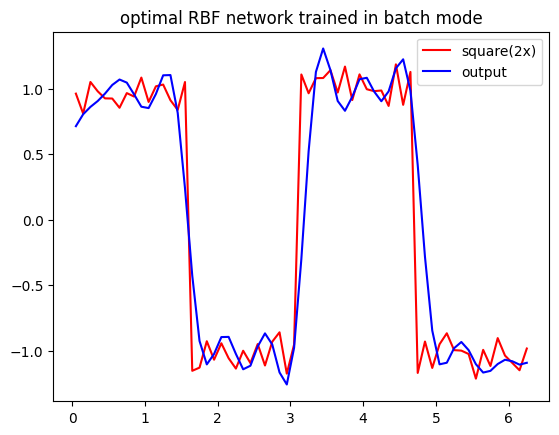

In [480]:
list_num_hidden = [20]
learning_rate = 0.01
num_iterations = 2
result_val = []
result_tra = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set2_noisy,learning_rate,num_iterations,True)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    print(output.shape)
    print(test_set2_noisy.shape)
    result_val.append(absolut_residual_error(output, test_set2_noisy))

    hidden_layer = np.zeros((num_hidden, len(x_train)))
    for i in range(num_hidden):
        for j in range(len(x_train)):
            hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_tra.append(absolut_residual_error(output, training_set2_noisy))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

print(result_val, result_tra)
plt.plot(x_test, test_set2_noisy, 'r', label='square(2x)')
plt.plot(x_test, output, 'b', label='output')
plt.title('optimal RBF network trained in batch mode')
plt.legend()
plt.show()



[0.08633838196259565] [0.06832398900836337]


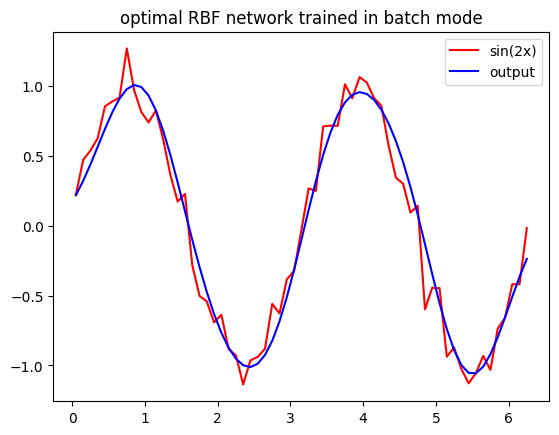

In [481]:
list_num_hidden = [10]
learning_rate = 0.01
num_iterations = 2
result_val = []
result_tra = []
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train(num_hidden,x_train,training_set1_noisy,learning_rate,num_iterations,True)
    hidden_layer = np.zeros((num_hidden, len(x_test)))
    for i in range(num_hidden):
        for j in range(len(x_test)):
            hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_val.append(absolut_residual_error(output, test_set1_noisy))

    hidden_layer = np.zeros((num_hidden, len(x_train)))
    for i in range(num_hidden):
        for j in range(len(x_train)):
            hidden_layer[i][j] = np.exp(-((x_train[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output, hidden_layer)
    output = output.T.reshape(-1)
    result_tra.append(absolut_residual_error(output, training_set1_noisy))
#print('The average absolute difference between the network outputs and the desirable target values:',absolut_residual_error(output, test_set1))

print(result_val, result_tra)
plt.plot(x_test, test_set1_noisy, 'r', label='sin(2x)')
plt.plot(x_test, output, 'b', label='output')
plt.title('optimal RBF network trained in batch mode')
plt.legend()
plt.show()



In [482]:

#a single-hidden-layer perceptron trained with backprop (also in batch mode) to address the same regression problem
#implementing a two layer perceptron trained with backpropagation
input = np.array([x_train])
target = np.array([training_set1_noisy])

#activation function
def phi(x,deriv=False):
    phi = 2/(1+np.exp(-x))-1
    if deriv:
        return (1+phi)*(1-phi)*0.5
    return phi

#forwards propagation
def forward(x,w,v):
    one = np.ones((1,x.shape[1]))
    x = np.concatenate((x,one),axis=0)
    z1 = np.dot(w,x)
    a1 = phi(z1)
    a1 = np.concatenate((a1,one),axis=0)
    z2 = np.dot(v,a1)
    a2 = phi(z2)
    return a2



#backwards propagation
def backward(x,targets,eta, w ,v):
    one = np.ones((1,x.shape[1]))
    x = np.concatenate((x,one),axis=0)
    hin = np.dot(w,x)
    hout = np.concatenate((phi(hin),one),axis=0)
    oin = np.dot(v,hout)
    out= phi(oin)
    delta_o = np.multiply((out-targets),(1+out)*(1-out)/2)
    delta_h = np.multiply(np.dot(v.T,delta_o),(1+hout)*(1-hout)/2)

    #removing the bias
    delta_h = delta_h[:-1,:]

    v -= eta*np.dot(delta_o,hout.T)
    w -= eta*np.dot(delta_h,x.T)
    return w,v
    
#loss function
def loss(x,targets,w,v):
    out = forward(x,w,v)
    return np.sum((out-targets)**2)/x.shape[1]

#initializing the weights and epochs
input_size = 1
node_layer1 = 20
output_layer = 1

#adding bias to the input
input_size += 1

w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)

try:
    forward(input,w,v)
    print("forward pass successful")
except:
    print("forward pass failed")

try:
    backward(input,target,0.1,w,v)
    print("backward pass successful")
except:
    print("backward pass failed")





forward pass successful
backward pass successful


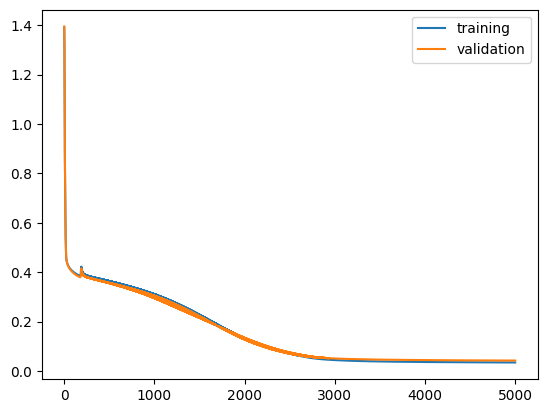

In [483]:
#initializing the weights and epochs
input_size = 1
node_layer1 = 10
output_layer = 1

#adding bias to the input
input_size += 1

#train the network
input = np.array([x_train])
target = np.array([training_set1_noisy])

validation = np.array([x_test])
validation_target = np.array([test_set1_noisy])

error = np.zeros(5000)
error_val = np.zeros(5000)
w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)
for i in range(5000):
    error[i] = loss(input,target,w,v)
    error_val[i] = loss(validation,validation_target,w,v)
    w,v = backward(input,target,0.007,w,v)
    
#plot the error
plt.plot(error, label = 'training')
plt.plot(error_val, label = 'validation')
plt.legend()
plt.show()

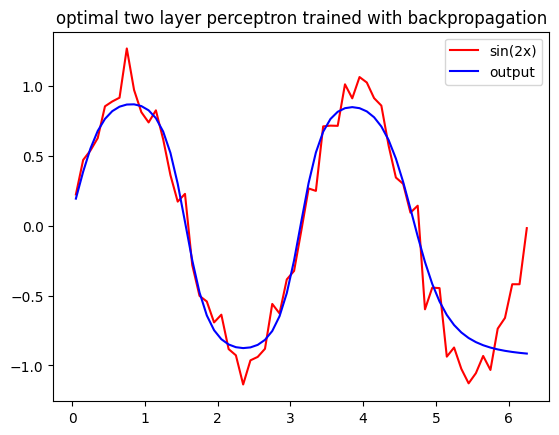

(63,)
(63,)
0.14573569573204037


In [484]:

#test the network
output = forward(np.array([x_test]),w,v)
#plot the values of the training set
plt.plot(x_test, test_set1_noisy, 'r', label='sin(2x)')
#plot the values of the output
plt.plot(x_test, output.T, 'b', label='output')
plt.legend()
plt.title('optimal two layer perceptron trained with backpropagation')
plt.show()

output = output.T.reshape(-1)
print(output.shape)
print(test_set2_noisy.shape)
print(absolut_residual_error(output, test_set1_noisy))

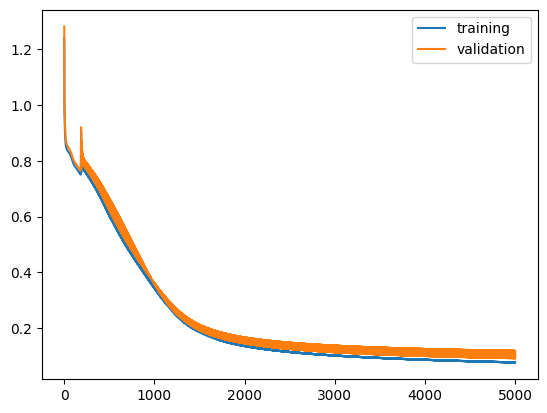

In [485]:
#initializing the weights and epochs
input_size = 1
node_layer1 = 10
output_layer = 1

#adding bias to the input
input_size += 1

#train the network
input = np.array([x_train])
target = np.array([training_set2_noisy])

validation = np.array([x_test])
validation_target = np.array([test_set2_noisy])

error = np.zeros(5000)
error_val = np.zeros(5000)
w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)
for i in range(5000):
    error[i] = loss(input,target,w,v)
    error_val[i] = loss(validation,validation_target,w,v)
    w,v = backward(input,target,0.007,w,v)
    
#plot the error
plt.plot(error, label = 'training')
plt.plot(error_val, label = 'validation')
plt.legend()
plt.show()


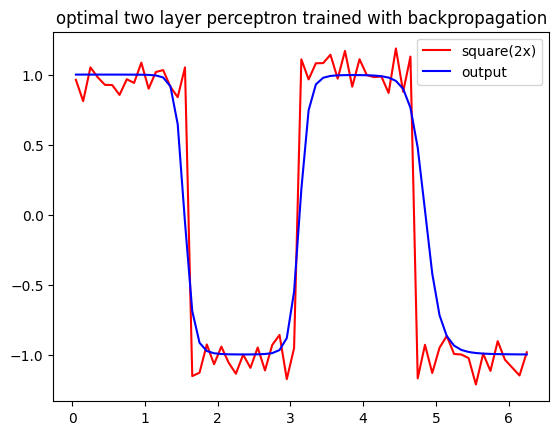

(63,)
(63,)
0.18314076121060993


In [497]:

#test the network
output = forward(np.array([x_test]),w,v)
#plot the values of the training set
plt.plot(x_test, test_set2_noisy, 'r', label='square(2x)')
#plot the values of the output
plt.plot(x_test, output.T, 'b', label='output')
plt.title('optimal two layer perceptron trained with backpropagation')
plt.legend()
plt.show()
output = output.T.reshape(-1)
print(output.shape)
print(test_set2_noisy.shape)
print(absolut_residual_error(output, test_set2_noisy))



In [487]:
#implementation competitive learning, vector quantization
def competitive_learning(x_train, num_neurons, learning_rate, num_iterations):
    #initialize the weights
    weights = np.random.rand(num_neurons)
    for iteration in range(num_iterations):
        #shuffle the training set
        indices = np.random.permutation(len(x_train))
        x_train = x_train[indices]
        for j in range(len(x_train)):
            #calculate the distance between the input and the weights
            distances = (weights-x_train[j])**2
            #find the index of the winner neuron
            winner = np.argmin(distances)
            #update the weights of the winner neuron
            weights[winner] += learning_rate*(x_train[j]-weights[winner])
    return weights



In [488]:
def result_train_competitive(num_hidden,x_train,training,learning_rate,num_iterations,learning_rate_cl,num_iterations_cl,batch = True):
    #implementation supervised learning of weights of the RBF network built to address a simple regression problem, batch learning from scratch

#number of neurons in the output layer 1
    num_output = 1
#initialize the weights of the output layer
    w_output = np.random.rand(num_output, num_hidden)

#initialize the centers of the RBF neurons
    centers = competitive_learning(x_train, num_hidden, learning_rate_cl, num_iterations_cl)

#initialize the widths of the RBF neurons
    widths = np.ones(num_hidden)*(2*np.pi/(num_hidden))

#initialize the error
    error_1 = np.zeros(num_iterations)

#train the network
    if batch:
        w_output_1, error_1 = RBF_train_batch(x_train, training,num_hidden,w_output, centers, widths, learning_rate, num_iterations, error_1)
    else:
    
        w_output_1, error_1 = RBF_train_sequential(x_train, training,num_hidden,w_output, centers, widths, learning_rate, num_iterations, error_1)
    return w_output_1, error_1,centers,widths
    

(63,)
(63,)


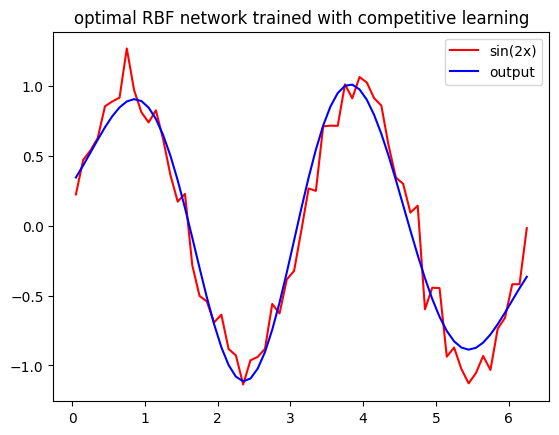

[0.12473497039802757]


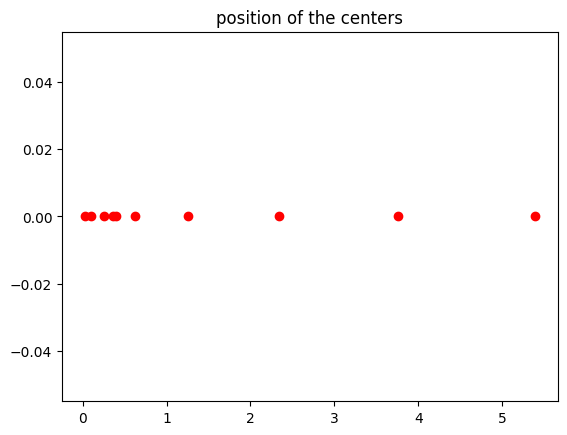

In [500]:
num_hidden = 10
learning_rate_cl = 0.01
learning_rate = 0.1
num_iterations_cl = 100
num_iterations = 20
result_val = []
print(training_set1_noisy.shape)
print(x_train.shape)
w_output, error,centers,widths = result_train_competitive(num_hidden,x_train,training_set1_noisy,learning_rate,num_iterations,learning_rate_cl,num_iterations_cl,False)
hidden_layer = np.zeros((num_hidden, len(x_test)))
for i in range(num_hidden):
    for j in range(len(x_test)):
        hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
output = np.dot(w_output, hidden_layer)
output = output.T.reshape(-1)
result_val.append(absolut_residual_error(output, test_set1_noisy))

#plot the values of the test set
plt.plot(x_test, test_set1_noisy, 'r', label='sin(2x)')
#plot the values of the output
plt.plot(x_test, output, 'b', label='output')
plt.legend()
plt.title('optimal RBF network trained with competitive learning')
plt.show()

print(result_val)

#plot position of the centers
plt.plot(centers, np.zeros(num_hidden), 'ro')
plt.title('position of the centers')
plt.show()




0.5565851470768141


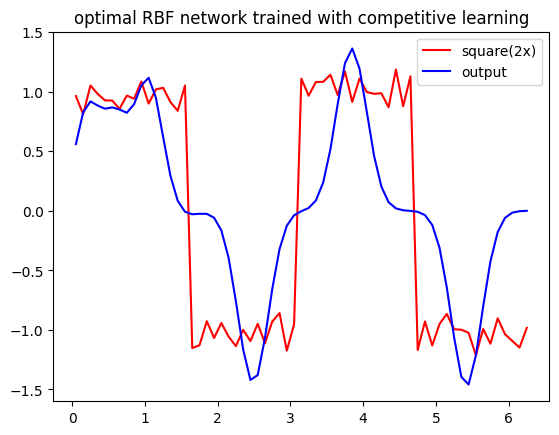

In [490]:
num_hidden = 30
learning_rate_cl = 0.001
learning_rate = 0.1
num_iterations_cl = 1000
num_iterations = 200
result_val = []

w_output, error,centers,widths = result_train_competitive(num_hidden,x_train,training_set2_noisy,learning_rate,num_iterations,learning_rate_cl,num_iterations_cl,False)
hidden_layer = np.zeros((num_hidden, len(x_test)))
for i in range(num_hidden):
    for j in range(len(x_test)):
        hidden_layer[i][j] = np.exp(-((x_test[j]-centers[i])**2)/(2*widths[i]**2))
#calculate the output of the network
output = np.dot(w_output, hidden_layer)
output = output.T.reshape(-1)
print(absolut_residual_error(output, test_set2_noisy))

#plot the values of the test set
plt.plot(x_test, test_set2_noisy, 'r', label='square(2x)')
#plot the values of the output
plt.plot(x_test, output, 'b', label='output')
plt.legend()
plt.title('optimal RBF network trained with competitive learning')
plt.show()




In [491]:
#load the data ballist.dat
data_train = np.loadtxt('data_lab2/ballist.dat')
print(data_train.shape)
x_train_2 = data_train[:,0:2]
print(x_train.shape)
training_set3 = data_train[:,:2]
print(training_set1.shape)

data_test = np.loadtxt('data_lab2/balltest.dat')
x_test_2 = data_test[:,0:2]
test_set3 = data_test[:,:2]



(100, 4)
(63,)
(63,)


In [530]:
def RBF_train_batch_2(x_train, t_train,num_hidden, w_output, centers, widths, num_iterations, error):
    for iteration in range(num_iterations):
        #calculate the values of the hidden layer
        hidden_layer = np.zeros((num_hidden, len(x_train)))
        for i in range(num_hidden):
            for j in range(len(x_train)):
                distance = np.sum((x_train[j]-centers[i])**2)
                hidden_layer[i][j] = np.exp(-distance/(2*widths[i]**2))
        #calculate the output of the network
        output = np.dot(w_output,hidden_layer)
        #calculate the error
        error[iteration] = 0.5*np.sum((t_train.T-output)**2)
        #calculate the gradient of the output layer
        inverse = np.linalg.inv(np.dot(hidden_layer, hidden_layer.T))
        matrix = np.dot(hidden_layer,t_train)
        #update the weights of the output layer
        w_output = np.dot(inverse,matrix).T
        
    return w_output, error

#implementation competitive learning, vector quantization
def competitive_learning_2(x_train, num_neurons, learning_rate, num_iterations):
    #initialize the weights
    weights = np.random.rand(num_neurons,x_train_2.shape[1])
    for iteration in range(num_iterations):
        #shuffle the training set
        indices = np.random.permutation(len(x_train))
        x_train = x_train[indices]
        for j in range(len(x_train)):
            #calculate the distance between the input and the weights
            distances = np.sum((weights-x_train[j])**2,axis = 1)
            #find the index of the winner neuron
            winner = np.argmin(distances)
            #update the weights of the winner neuron
            weights[winner] += learning_rate*(x_train[j]-weights[winner])
    return weights

def result_train_competitive_2(num_hidden,x_train,training,learning_rate,num_iterations,learning_rate_cl,num_iterations_cl,batch = True):
    #implementation supervised learning of weights of the RBF network built to address a simple regression problem, batch learning from scratch

#number of neurons in the output layer 1
    num_output = 2
#initialize the weights of the output layer
    w_output = np.random.rand(num_output, num_hidden)

#initialize the centers of the RBF neurons
    centers = competitive_learning_2(x_train, num_hidden, learning_rate_cl, num_iterations_cl)

#initialize the widths of the RBF neurons
    widths = np.ones(num_hidden)*(6/(num_hidden))

#initialize the error
    error_1 = np.zeros(num_iterations)

#train the network
    w_output_1, error_1 = RBF_train_batch_2(x_train, training,num_hidden,w_output, centers, widths, num_iterations, error_1)
    return w_output_1, error_1,centers,widths


In [531]:
list_num_hidden = [i for i in range(1, 10)]
learning_rate_cl = 0.001
learning_rate = 0.1
num_iterations_cl = 1000
num_iterations = 2
result_val = []
result_train =[]
for num_hidden in list_num_hidden:
    w_output, error,centers,widths = result_train_competitive_2(num_hidden,x_train_2,training_set3,learning_rate,num_iterations,learning_rate_cl,num_iterations_cl,False)
    hidden_layer = np.zeros((num_hidden, len(x_test_2)))
    for i in range(num_hidden):
        for j in range(len(x_test_2)):
            distance = np.sum((x_test_2[j]-centers[i])**2)
            hidden_layer[i][j] = np.exp(-distance/(2*widths[i]**2))
#calculate the output of the network
    output = np.dot(w_output,hidden_layer)
    result_val += [0.5*np.sum((test_set3.T-output)**2)]
    result_train += [error[-1]]
    print(num_hidden)

plt.plot(list_num_hidden, result_val, label = 'validation')
plt.plot(list_num_hidden, result_train, label = 'training')
plt.xlabel('Number of hidden neurons')
plt.ylabel('error')
plt.title('The average absolute difference between the network outputs and the desirable target values')
plt.legend()
plt.show()



1
2


In [ ]:

print(min(result_val), list_num_hidden[result_val.index(min(result_val))])

0.009740327555704751 3


In [ ]:

num_hidden = list_num_hidden[result_val.index(min(result_val))]
learning_rate_cl = 0.001
learning_rate = 0.1
num_iterations_cl = 1000
num_iterations = 2

w_output, error,centers,widths = result_train_competitive_2(num_hidden,x_train_2,training_set3,learning_rate,num_iterations,learning_rate_cl,num_iterations_cl,False)
hidden_layer = np.zeros((num_hidden, len(x_test_2)))
for i in range(num_hidden):
        for j in range(len(x_test_2)):
            distance = np.sum((x_test_2[j]-centers[i])**2)
            hidden_layer[i][j] = np.exp(-distance/(2*widths[i]**2))
#calculate the output of the network
output = np.dot(w_output,hidden_layer)
result_val += [0.5*np.sum((test_set3.T-output)**2)]
result_train += [error[-1]]
print(error[-1])

0.01478886955139316


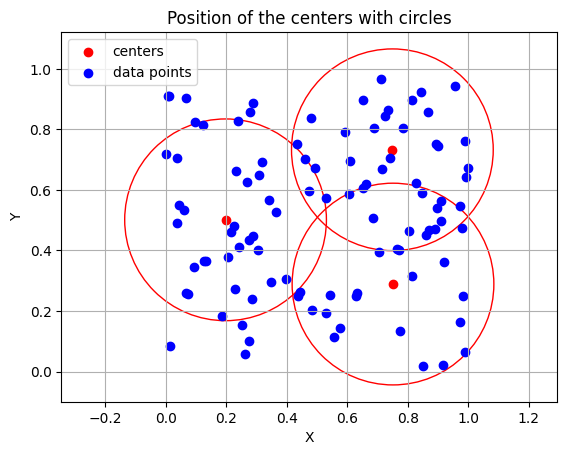

In [ ]:

# Define the radius for the circles around RBF neuron centers
radius = (1/(num_hidden))  # Example radius

# Plot the centers of the RBF neurons and the data points with their width
plt.scatter(centers[:, 0], centers[:, 1], c='r', label='centers')

# Plot circles around the RBF neuron centers
for center in centers:
    circle = plt.Circle((center[0], center[1]), radius, color='r', fill=False)
    plt.gca().add_patch(circle)

plt.scatter(x_train_2[:, 0], x_train_2[:, 1], c='b', label='data points')
plt.legend()
plt.title('Position of the centers with circles')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio for x and y axes
plt.show()
